# Mini Project: Sensor Health Monitoring – apply slicing, filtering, and boolean operations to simulate and evaluate sensor data

In [1]:
import pandas as pd
df = pd.read_csv(r"G:\DIYguru\Data-Science-and-Engineering-Analytics\Assignments\other_source_files\sensor_health_monitoring_advanced.csv")
print(df.head(5))
df.describe()

             Timestamp Sensor_ID  Temperature_C  Vibration_mm_s  Pressure_bar  \
0  2025-03-29 09:42:00       S13           38.7            2.17          5.69   
1  2025-03-29 15:15:00        S5           32.7            3.73          5.81   
2  2025-03-29 22:20:00        S1           43.9            1.55          5.16   
3  2025-03-29 12:30:00        S1           49.4            1.94          5.79   
4  2025-03-29 09:46:00       S18           38.2            3.88          5.56   

   Battery_%  Operating_Hours    Status  
0         62              818    Normal  
1         31             4868  Critical  
2         47               12   Warning  
3         76             7727   Warning  
4         62              920   Warning  


,Temperature_C,Vibration_mm_s,Pressure_bar,Battery_%,Operating_Hours
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.130000,2.570220,5.473130,65.369000,4994.745000
std,5.994138,1.201338,0.697287,20.374002,2942.461997
min,19.900000,-1.560000,3.160000,30.000000,12.000000
25%,36.000000,1.750000,4.970000,48.000000,2510.750000
50%,40.200000,2.625000,5.475000,66.000000,4873.500000
75%,44.200000,3.402500,5.990000,83.000000,7631.750000
max,58.600000,6.700000,7.540000,99.000000,9998.000000


Vibration outlier is Sensor ID: S6 (6.7_mm_s)
High Temp Low Battery Sensor ID is S5 (50.1_C, 31_%)


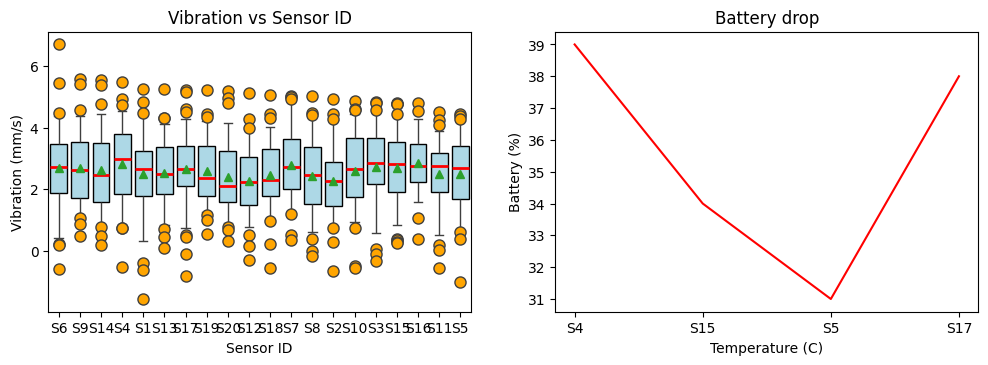

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"G:\DIYguru\Data-Science-and-Engineering-Analytics\Assignments\other_source_files\sensor_health_monitoring_advanced.csv")

unique_status = df['Status'].unique()
#print(unique_status)

df_filtered = df[df["Status"].isin(["Critical", "Warning"])]
#print(df_filtered.describe())
#print(df_filtered)

mean_values = df[["Temperature_C", "Vibration_mm_s", "Pressure_bar","Battery_%","Operating_Hours"]].mean()
std_values = df[["Temperature_C", "Vibration_mm_s", "Pressure_bar","Battery_%","Operating_Hours"]].std()
#print("Mean")
#print(mean_values)
#print("\nStandard deviation")
#print(std_values)

check="Vibration_mm_s"
z_scores = np.abs((df[check] - mean_values[check]) / std_values[check])
outliers = z_scores > 3
#print("Outliers:")
#print(outliers)
#print(df_filtered[outliers])
vibration_outliers = df[outliers]
print(f"Vibration outlier is Sensor ID: {df.iloc[vibration_outliers['Sensor_ID'].idxmax()]['Sensor_ID']} ({df.iloc[vibration_outliers['Sensor_ID'].idxmax()]['Vibration_mm_s']}_mm_s)")

high_temp_low_battery = df[(df["Temperature_C"] > 50) & (df["Battery_%"] < 40)]
print(f"High Temp Low Battery Sensor ID is {df.iloc[high_temp_low_battery['Sensor_ID'].idxmax()]['Sensor_ID']} ({df.iloc[high_temp_low_battery['Sensor_ID'].idxmax()]['Temperature_C']}_C, {df.iloc[high_temp_low_battery['Sensor_ID'].idxmax()]['Battery_%']}_%)")

plt.figure(figsize=(12, 8))

sub = plt.subplot(2,2,1)
df = df.sort_values(by=['Vibration_mm_s'], ascending=False)
#plt.plot(df['Sensor_ID'],df['Vibration_mm_s'] , marker='o', linestyle='-', color='b', label="Sensor Readings")
#plt.bar(df['Sensor_ID'],df['Vibration_mm_s'], color='b', label="Sensor Readings")
#plt.scatter(df['Sensor_ID'], df['Vibration_mm_s'], color='b', label="Sensor Readings")
#plt.axhline(y=df['Vibration_mm_s'].mean(), color='r', linestyle='--', label="Mean")
sns.boxplot(x="Sensor_ID", y="Vibration_mm_s", data=df,
            boxprops={"facecolor": "lightblue", "edgecolor": "black"},
            medianprops={"color": "red", "linewidth": 2},
            flierprops={"marker": "o", "markerfacecolor": "orange", "markersize": 8},
            showfliers=True,
            showmeans=True,
            whis=[5,95])
plt.xlabel('Sensor ID')
plt.ylabel('Vibration (mm/s)')
plt.title('Vibration vs Sensor ID')

sub = plt.subplot(2,2,2)
plt.plot(high_temp_low_battery['Sensor_ID'], high_temp_low_battery['Battery_%'], color='r', label="Battery drop")
plt.xlabel('Temperature (C)')
plt.ylabel('Battery (%)')
plt.title('Battery drop')
plt.show()